In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
%%time
dj_1=pd.read_csv('dj_-20.csv')

<string>:2: DtypeWarning: Columns (2,8,27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 11.1 s


In [4]:
from pandasql import sqldf

In [5]:
pysqldf=lambda q: sqldf(q,globals())

In [6]:
dt=dj_1['text']

In [7]:
dt.head()

0    I'd tell you to hide your wallet, but it's pro...
1    Will be heading the the conservative bloggers ...
2    I'm speaking on the floor shortly to in opposi...
3    I'm speaking on the floor shortly to in opposi...
4                        Attending a Whip Team meeting
Name: text, dtype: object

In [8]:
dt.dtype

dtype('O')

In [9]:
dt[0]

"I'd tell you to hide your wallet, but it's probably too late. This will likely be a very bad week. Will keep you updated as the slog goes on"

In [10]:
# dt[0].dtype #run it to see it is already string type

In [11]:
dt0=dt[:1000]

In [12]:
from textblob import TextBlob

In [13]:
dt0['sentiment']=dt0.apply(lambda text: TextBlob(text).sentiment[0])

In [14]:
dt0.head()

0    I'd tell you to hide your wallet, but it's pro...
1    Will be heading the the conservative bloggers ...
2    I'm speaking on the floor shortly to in opposi...
3    I'm speaking on the floor shortly to in opposi...
4                        Attending a Whip Team meeting
Name: text, dtype: object

In [15]:
dt_1=dj_1[['text','id']]

In [16]:
dt_1=dt_1[:1000]

In [17]:
dt_1.head()

,text,id
0,"I'd tell you to hide your wallet, but it's pro...",930546663
1,Will be heading the the conservative bloggers ...,931746104
2,I'm speaking on the floor shortly to in opposi...,931747655
3,I'm speaking on the floor shortly to in opposi...,931748572
4,Attending a Whip Team meeting,932162206


In [18]:
dt_1['sentiment']=dt_1.text.apply(lambda text: TextBlob(text).sentiment[0])

In [19]:
dt_1.head()

,text,id,sentiment
0,"I'd tell you to hide your wallet, but it's pro...",930546663,-0.403333
1,Will be heading the the conservative bloggers ...,931746104,0.000000
2,I'm speaking on the floor shortly to in opposi...,931747655,0.000000
3,I'm speaking on the floor shortly to in opposi...,931748572,0.000000
4,Attending a Whip Team meeting,932162206,0.000000


In [20]:
dt_1['sentiment'].value_counts()

 0.000000    516
 0.200000     32
 0.500000     31
 0.136364     24
 0.100000     22
            ... 
 0.207143      1
 0.268182      1
 0.075000      1
-0.403333      1
 0.253267      1
Name: sentiment, Length: 191, dtype: int64

Text(0, 0.5, 'Sentiment counts')

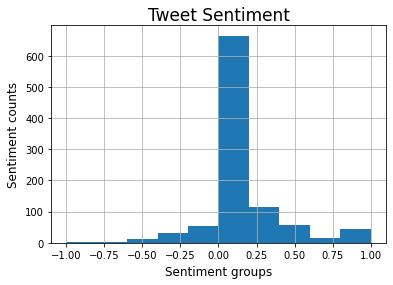

In [62]:
dt_1['sentiment'].hist()
plt.title('Tweet Sentiment',fontsize=17,pad=5)
plt.xlabel("Sentiment groups",fontsize=12,labelpad=5)
plt.ylabel("Sentiment counts",fontsize=12,labelpad=5)

In [22]:
dt_1.sort_values(by='sentiment', ascending=False)

,text,id,sentiment
107,@dailybragger and residents of the 11th Congre...,1110340829,1.000
653,@gordongates your chowder sounded great!,1291349506,1.000
789,Happy St. Patrick's Day Twitterers!,1341919634,1.000
887,"@Flexlewis1 jesse, I truly appreciate the feed...",1376122367,1.000
311,"Pelosi is great laying out what we've done, th...",1184893448,1.000
...,...,...,...
638,BREAKING: GUILTY VERDICT IN HOMEGOLD CAROLINA ...,1289738786,-0.625
683,the President's embryonic stem cell support is...,1305248036,-0.700
966,@foolery Some are very dangerous.,1397746400,-0.780
883,Rev Creech's smoking ban editorial in The Obse...,1370457081,-0.800


In [23]:
dj_1['year'] = pd.DatetimeIndex(dj_1['created_at']).year

In [24]:
dt3=dj_1[dj_1['year']==2016][['text','id','favorite_count']]

In [25]:
dt3.shape

(354942, 3)

In [26]:
dt3.head()

,text,id,favorite_count
659046,#TeamHolcomb Year In Review: Eric wrote an op-...,682712993042313217,3
659047,Some of the great people I saw in 2015. Lookin...,682712996657807361,10
659048,Wishing you and your loved ones a safe and hap...,682714181900972034,13
659049,MT @c_sjohnson: New Lt. Gov. Mike Cooney is on...,682714197831102465,4
659050,For a compiled a list of the ongoing efforts b...,682715622715846657,5


In [27]:
%%time
dt3['sentiment']=dt3.text.apply(lambda text: TextBlob(text).sentiment[0])

Wall time: 1min 8s


In [28]:
dt3.head()

,text,id,favorite_count,sentiment
659046,#TeamHolcomb Year In Review: Eric wrote an op-...,682712993042313217,3,0.000000
659047,Some of the great people I saw in 2015. Lookin...,682712996657807361,10,0.478788
659048,Wishing you and your loved ones a safe and hap...,682714181900972034,13,0.666667
659049,MT @c_sjohnson: New Lt. Gov. Mike Cooney is on...,682714197831102465,4,0.078788
659050,For a compiled a list of the ongoing efforts b...,682715622715846657,5,0.000000


<AxesSubplot:>

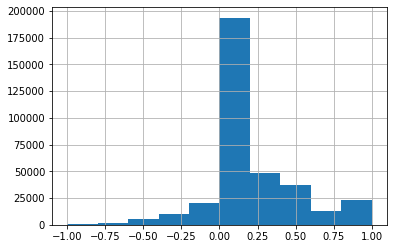

In [29]:
dt3['sentiment'].hist()

In [30]:
from scipy.stats import pearsonr

In [31]:
corr, _ = pearsonr(dt3['sentiment'], dt3['favorite_count'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: -0.011


In [32]:
dt3_p=dt3[dt3['sentiment']>0.5]

In [33]:
corr, _ = pearsonr(dt3_p['sentiment'], dt3_p['favorite_count'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.006


In [34]:
dt3_n=dt3[dt3['sentiment']<-0.5]

In [35]:
corr, _ = pearsonr(dt3_n['sentiment'], dt3_n['favorite_count'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.032


In [36]:
dt4=dj_1[dj_1['year']==2016][['text','id','favorite_count','created_at']]

In [37]:
%%time
dt4['sentiment']=dt4.text.apply(lambda text: TextBlob(text).sentiment[0])

Wall time: 1min 10s


In [38]:
dt4['year'] = pd.DatetimeIndex(dt4['created_at']).year
dt4['month'] = pd.DatetimeIndex(dt4['created_at']).month

In [39]:
dt4.head()

,text,id,favorite_count,created_at,sentiment,year,month
659046,#TeamHolcomb Year In Review: Eric wrote an op-...,682712993042313217,3,2016-01-01 00:00:36,0.000000,2016,1
659047,Some of the great people I saw in 2015. Lookin...,682712996657807361,10,2016-01-01 00:00:37,0.478788,2016,1
659048,Wishing you and your loved ones a safe and hap...,682714181900972034,13,2016-01-01 00:05:19,0.666667,2016,1
659049,MT @c_sjohnson: New Lt. Gov. Mike Cooney is on...,682714197831102465,4,2016-01-01 00:05:23,0.078788,2016,1
659050,For a compiled a list of the ongoing efforts b...,682715622715846657,5,2016-01-01 00:11:03,0.000000,2016,1


In [40]:
dt5=pysqldf("""SELECT COUNT(*) OVER (PARTITION BY month) 
As NumPerMonth, 
month+' '+year As TheMonth,
favorite_count, sentiment,id
FROM dt4
ORDER BY created_at;""")

In [41]:
dt5

,NumPerMonth,TheMonth,favorite_count,sentiment,id
0,24894,2017,3,0.000000,682712993042313217
1,24894,2017,10,0.478788,682712996657807361
2,24894,2017,13,0.666667,682714181900972034
3,24894,2017,4,0.078788,682714197831102465
4,24894,2017,5,0.000000,682715622715846657
...,...,...,...,...,...
354937,24738,2028,9,0.267273,815343362832236544
354938,24738,2028,74,0.000000,815344665440518144
354939,24738,2028,20,0.200000,815345605660864512
354940,24738,2028,121,0.000000,815345747965120512


In [42]:
dt6=dt4[['favorite_count','month']]

In [43]:
dt6

,favorite_count,month
659046,3,1
659047,10,1
659048,13,1
659049,4,1
659050,5,1
...,...,...
1013983,9,12
1013984,74,12
1013985,20,12
1013986,121,12


In [44]:
pysqldf("""SELECT sum(favorite_count) OVER(Partition by month) As favm
FROM dt4
ORDER BY month""")
# SELECT duration_seconds,
#        SUM(duration_seconds) OVER (ORDER BY start_time) AS running_total
#   FROM tutorial.dc_bikeshare_q1_2012

,favm
0,488046
1,488046
2,488046
3,488046
4,488046
...,...
354937,13033762
354938,13033762
354939,13033762
354940,13033762


In [45]:
dt4['favorite_count'][dt4['month']==1].sum()

488046

In [46]:
pysqldf("""SELECT max(favorite_count) OVER(Partition by month) As favm, sentiment
FROM dt4
ORDER BY month""")

,favm,sentiment
0,29165,0.000000
1,29165,0.478788
2,29165,0.666667
3,29165,0.078788
4,29165,0.000000
...,...,...
354937,347262,0.267273
354938,347262,0.000000
354939,347262,0.200000
354940,347262,0.000000


In [47]:
dt4['favorite_count'][dt4['month']==1].max()

29165

In [48]:
pysqldf("""SELECT Rank() OVER(Partition by month) As favm
FROM dt6
ORDER BY month""")#??

,favm
0,1
1,1
2,1
3,1
4,1
...,...
354937,1
354938,1
354939,1
354940,1


maybe window functions not so good here, because goal is to narrow down number of lines, not display a metric for each tweet

In [49]:
from collections import Counter

In [50]:
import nltk
from nltk.corpus import stopwords

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
stopwords =['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [54]:
wo_dict=dt4.text.apply(lambda word: (word.lower() for word in word.split(' ') if word.lower() not in stopwords))

tbody=[] 
for ea in wo_dict:
    tbody += ea
wordDict=Counter(tbody)
[(k,v) for k,v in sorted (wordDict.items(), key=lambda item: item[1], reverse=True)][:50]


[('rt', 80141),
 ('&amp;', 67438),
 ('', 23706),
 ('great', 20070),
 ('today', 16719),
 ('thank', 13676),
 ('w/', 12542),
 ('new', 12481),
 ('-', 12293),
 ('thanks', 11580),
 ('us', 11266),
 ('help', 10087),
 ('house', 9615),
 ('bill', 9492),
 ('work', 9161),
 ('proud', 9004),
 ('must', 8980),
 ('time', 8748),
 ('support', 8727),
 ('need', 8400),
 ('happy', 8139),
 ('join', 7474),
 ('day', 7400),
 ('see', 7183),
 ('state', 7163),
 ('people', 7067),
 ('make', 6701),
 ('congress', 6572),
 ('good', 6331),
 ('one', 6322),
 ('get', 6193),
 ('american', 6183),
 ('health', 6148),
 ('act', 5965),
 ('last', 5891),
 ('watch', 5863),
 ('here:', 5852),
 ('read', 5597),
 ('honor', 5444),
 ('national', 5407),
 ('via', 5402),
 ("i'm", 5379),
 ('live', 5363),
 ('senate', 5349),
 ('students', 5345),
 ('congrats', 5265),
 ('first', 5171),
 ('women', 5166),
 ('americans', 5062),
 ('office', 4939)]

In [55]:
dt4_s=dt4.sort_values(by='sentiment', ascending=False)

In [56]:
dt4_s.head()

,text,id,favorite_count,created_at,sentiment,year,month
893664,This @RoundRockISD grad is training as a navy ...,768613925403275264,2,2016-08-25 01:00:14,1.0,2016,8
804952,Happy birthday Rep. @GreggHarper!,737992114089250816,0,2016-06-01 13:00:05,1.0,2016,6
869631,July = National Parks &amp; Recreation month. ...,758137842828660736,5,2016-07-27 03:12:01,1.0,2016,7
712545,Happy #SuperTuesday! For info on where you can...,704751809664032769,7,2016-03-01 19:34:59,1.0,2016,3
786837,RT @uhmanoa: 🌴 Happy #AlohaFriday! 🌴 https://t...,731216306964324352,0,2016-05-13 20:15:27,1.0,2016,5


In [57]:
dt4_s1=dt4_s[:1000]

In [58]:
dt4_s3=dt4_s.tail(1000)

In [59]:
wo_dict=dt4_s1.text.apply(lambda word: (word.lower() for word in word.split(' ') if word.lower() not in stopwords))

tbody=[] 
for ea in wo_dict:
    tbody += ea
wordDict=Counter(tbody)
[(k,v) for k,v in sorted (wordDict.items(), key=lambda item: item[1], reverse=True)][:50]

[('happy', 301),
 ('great', 293),
 ('rt', 191),
 ('birthday', 147),
 ('&amp;', 132),
 ('best', 106),
 ('', 81),
 ('proud', 76),
 ('thank', 70),
 ('today', 40),
 ('today!', 35),
 ('time', 33),
 ('birthday,', 33),
 ('w/', 31),
 ('wonderful', 31),
 ('day', 31),
 ('support', 29),
 ('congrats', 29),
 ('welcome', 28),
 ('see', 27),
 ('us', 27),
 ('https…', 26),
 ('-', 25),
 ('visit', 25),
 ('one', 25),
 ('greatest', 25),
 ('meeting', 25),
 ('wishing', 24),
 ('meet', 23),
 ('#jobs', 21),
 ('birthday!', 21),
 ('#startupday!', 20),
 ('join', 20),
 ('work', 19),
 ('startup', 19),
 ('you!', 19),
 ('#innovation.', 19),
 ('give', 19),
 ('recognition', 19),
 ('@repjaredpolis:', 18),
 ('companies', 18),
 ('create', 18),
 ('deserve!', 18),
 ('students', 17),
 ('news', 17),
 ('house', 17),
 ('help', 17),
 ('make', 16),
 ('rep.', 15),
 ('excellent', 15)]

In [60]:
wo_dict=dt4_s3.text.apply(lambda word: (word.lower() for word in word.split(' ') if word.lower() not in stopwords))

tbody=[] 
for ea in wo_dict:
    tbody += ea
wordDict=Counter(tbody)
[(k,v) for k,v in sorted (wordDict.items(), key=lambda item: item[1], reverse=True)][:50]

[('&amp;', 199),
 ('horrific', 167),
 ('rt', 161),
 ('devastating', 133),
 ('terrible', 107),
 ('prayers', 99),
 ('worst', 99),
 ('thoughts', 82),
 ('must', 81),
 ('families', 79),
 ('victims', 77),
 ('horrible', 73),
 ('attack', 71),
 ('people', 57),
 ('', 54),
 ('outrageous', 54),
 ('stand', 49),
 ('praying', 46),
 ('us', 46),
 ('affected', 43),
 ('news', 40),
 ('terror', 38),
 ('today', 35),
 ('evil', 35),
 ('awful', 33),
 ('act', 32),
 ('help', 30),
 ('fight', 29),
 ('bill', 28),
 ('heart', 28),
 ('congress', 28),
 ('terrorist', 26),
 ('shooting', 26),
 ('w/', 26),
 ('go', 26),
 ('attack.', 26),
 ('-', 25),
 ('another', 24),
 ('record', 24),
 ('attacks', 23),
 ('tragedy', 23),
 ('opioid', 23),
 ('lives', 21),
 ('one', 21),
 ('continue', 21),
 ('orlando.', 20),
 ('violence', 20),
 ('together', 20),
 ('tragedy.', 20),
 ('remember', 20)]